In [34]:
# Import pandas
import pandas as pd

# Import yfinance
import yfinance as yf

# Import numpy
import numpy as np

# Import plot lib
import matplotlib.pyplot as plt

# Import evaluate library
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error, mean_absolute_error

# Import the required libraries
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [35]:
# 'BTC-USD': 'Bitcoin USD',
# 'ETH-USD': 'Ethereum USD',
# 'SOL-USD': 'Solana USD'

crypto = "BTC-USD"
crypto_data = yf.Ticker(crypto)
info = crypto_data.info
for key,value in info.items():
    print(key,' : ',value)

name  :  Bitcoin
startDate  :  1278979200
description  :  Bitcoin (BTC) is a cryptocurrency launched in 2010. Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 19,796,178. The last known price of Bitcoin is 102,158.05922381 USD and is up 0.53 over the last 24 hours. It is currently trading on 11840 active market(s) with $38,778,167,638.77 traded over the last 24 hours. More information can be found at https://bitcoin.org/.
maxAge  :  86400
priceHint  :  2
previousClose  :  104447.664
open  :  104447.664
dayLow  :  104373.32
dayHigh  :  106449.88
regularMarketPreviousClose  :  104447.664
regularMarketOpen  :  104447.664
regularMarketDayLow  :  104373.32
regularMarketDayHigh  :  106449.88
volume  :  63453540352
regularMarketVolume  :  63453540352
averageVolume  :  50780451201
averageVolume10days  :  80234034944
averageDailyVolume10Day  :  80234034944
marketCap  :  2068718551040
fiftyTwoWeekLow  :  38521.895
fiftyTwoWeekHigh  :  106449.88
fiftyD

In [36]:
# Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]

# Period must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']

interval = "5m"
period = "5d"

In [37]:
crypto_data_hist = crypto_data.history(interval=interval,period=period)
print(crypto_data_hist)

                                    Open           High            Low  \
Datetime                                                                 
2024-12-12 00:00:00+00:00  101189.085938  101232.929688  101139.226562   
2024-12-12 00:05:00+00:00  101138.679688  101208.000000  101131.718750   
2024-12-12 00:10:00+00:00  101170.289062  101170.289062  101082.343750   
2024-12-12 00:15:00+00:00  101097.570312  101199.671875  101096.296875   
2024-12-12 00:20:00+00:00  101176.914062  101176.914062  100992.968750   
...                                  ...            ...            ...   
2024-12-16 03:45:00+00:00  104641.507812  104641.507812  104412.265625   
2024-12-16 03:50:00+00:00  104321.343750  104321.343750  104311.125000   
2024-12-16 03:55:00+00:00  104373.320312  104537.187500  104369.492188   
2024-12-16 04:00:00+00:00  104537.898438  104537.898438  104453.632812   
2024-12-16 04:05:00+00:00  104498.140625  104498.140625  104498.140625   

                                   Cl

In [38]:
# Clean the data for to keep only the required columns
crypto_data_close = crypto_data_hist[["Close"]]
print(crypto_data_close)

                                   Close
Datetime                                
2024-12-12 00:00:00+00:00  101156.507812
2024-12-12 00:05:00+00:00  101190.437500
2024-12-12 00:10:00+00:00  101095.375000
2024-12-12 00:15:00+00:00  101139.820312
2024-12-12 00:20:00+00:00  100992.968750
...                                  ...
2024-12-16 03:45:00+00:00  104412.265625
2024-12-16 03:50:00+00:00  104311.125000
2024-12-16 03:55:00+00:00  104537.187500
2024-12-16 04:00:00+00:00  104453.632812
2024-12-16 04:05:00+00:00  104498.140625

[1202 rows x 1 columns]


In [39]:
# Fill missing values
crypto_data_close = crypto_data_close.ffill()
print(crypto_data_close)

                                   Close
Datetime                                
2024-12-12 00:00:00+00:00  101156.507812
2024-12-12 00:05:00+00:00  101190.437500
2024-12-12 00:10:00+00:00  101095.375000
2024-12-12 00:15:00+00:00  101139.820312
2024-12-12 00:20:00+00:00  100992.968750
...                                  ...
2024-12-16 03:45:00+00:00  104412.265625
2024-12-16 03:50:00+00:00  104311.125000
2024-12-16 03:55:00+00:00  104537.187500
2024-12-16 04:00:00+00:00  104453.632812
2024-12-16 04:05:00+00:00  104498.140625

[1202 rows x 1 columns]


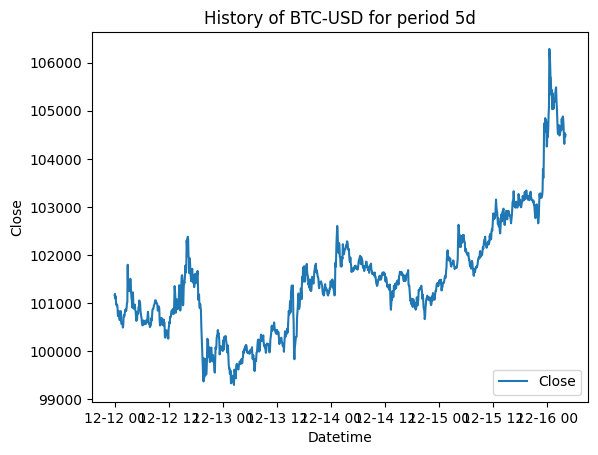

In [40]:
plt.title(f"History of {crypto} for period {period}")
plt.xlabel('Datetime')
plt.ylabel('Close')
 
plt.plot(crypto_data_hist['Close'])

plt.legend(['Close'], loc='lower right')

plt.show()

In [41]:
# Clean the data for to keep only the required columns
crypto_data_close = crypto_data_hist[["Close"]]
print(crypto_data_close)

                                   Close
Datetime                                
2024-12-12 00:00:00+00:00  101156.507812
2024-12-12 00:05:00+00:00  101190.437500
2024-12-12 00:10:00+00:00  101095.375000
2024-12-12 00:15:00+00:00  101139.820312
2024-12-12 00:20:00+00:00  100992.968750
...                                  ...
2024-12-16 03:45:00+00:00  104412.265625
2024-12-16 03:50:00+00:00  104311.125000
2024-12-16 03:55:00+00:00  104537.187500
2024-12-16 04:00:00+00:00  104453.632812
2024-12-16 04:05:00+00:00  104498.140625

[1202 rows x 1 columns]


In [42]:
# Fill missing values
crypto_data_close = crypto_data_close.ffill()
print(crypto_data_close)

                                   Close
Datetime                                
2024-12-12 00:00:00+00:00  101156.507812
2024-12-12 00:05:00+00:00  101190.437500
2024-12-12 00:10:00+00:00  101095.375000
2024-12-12 00:15:00+00:00  101139.820312
2024-12-12 00:20:00+00:00  100992.968750
...                                  ...
2024-12-16 03:45:00+00:00  104412.265625
2024-12-16 03:50:00+00:00  104311.125000
2024-12-16 03:55:00+00:00  104537.187500
2024-12-16 04:00:00+00:00  104453.632812
2024-12-16 04:05:00+00:00  104498.140625

[1202 rows x 1 columns]


In [43]:
# Scale into range 0..1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(crypto_data_close)
print(scaled_data)

[[0.26619761]
 [0.27105092]
 [0.25745317]
 ...
 [0.74977035]
 [0.73781868]
 [0.74418508]]


In [44]:
# Define train size
split = 0.8
train_size = int(len(scaled_data) * split)
print(train_size)

961


In [45]:
# Define training and testing area before scaled
train_data = crypto_data_close[:train_size]
test_data = crypto_data_close[train_size:]
print("Data Training")
print(train_data)
print("Data Testing")
print(test_data)

Data Training
                                   Close
Datetime                                
2024-12-12 00:00:00+00:00  101156.507812
2024-12-12 00:05:00+00:00  101190.437500
2024-12-12 00:10:00+00:00  101095.375000
2024-12-12 00:15:00+00:00  101139.820312
2024-12-12 00:20:00+00:00  100992.968750
...                                  ...
2024-12-15 07:40:00+00:00  101587.781250
2024-12-15 07:45:00+00:00  101563.859375
2024-12-15 07:50:00+00:00  101682.429688
2024-12-15 07:55:00+00:00  101703.460938
2024-12-15 08:00:00+00:00  101640.625000

[961 rows x 1 columns]
Data Testing
                                   Close
Datetime                                
2024-12-15 08:05:00+00:00  101695.953125
2024-12-15 08:10:00+00:00  101745.250000
2024-12-15 08:15:00+00:00  101736.882812
2024-12-15 08:20:00+00:00  101763.421875
2024-12-15 08:25:00+00:00  101741.914062
...                                  ...
2024-12-16 03:45:00+00:00  104412.265625
2024-12-16 03:50:00+00:00  104311.125000
2024-1

In [46]:
# Define training and testing area after scaled
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]
print("Data Training")
print(train_data)
print("Data Testing")
print(test_data)

Data Training
[[0.26619761]
 [0.27105092]
 [0.25745317]
 [0.26381063]
 [0.24280497]
 [0.23700626]
 [0.23974972]
 [0.23843666]
 [0.22628272]
 [0.20480995]
 [0.21995432]
 [0.22017111]
 [0.21379018]
 [0.19396684]
 [0.19489213]
 [0.21832165]
 [0.19226712]
 [0.2190659 ]
 [0.18191906]
 [0.18262979]
 [0.18450272]
 [0.18527045]
 [0.17078205]
 [0.17581863]
 [0.20112108]
 [0.20808981]
 [0.20424114]
 [0.21109254]
 [0.22233459]
 [0.2188614 ]
 [0.22510823]
 [0.22063823]
 [0.22913123]
 [0.24338831]
 [0.2459418 ]
 [0.35764046]
 [0.28483529]
 [0.3073764 ]
 [0.30496371]
 [0.27915168]
 [0.29243653]
 [0.30424069]
 [0.31596104]
 [0.30701433]
 [0.27775257]
 [0.2590579 ]
 [0.25020171]
 [0.23058063]
 [0.24955021]
 [0.27547175]
 [0.23699285]
 [0.22686494]
 [0.23677159]
 [0.2313383 ]
 [0.23905576]
 [0.22412818]
 [0.21844234]
 [0.20321974]
 [0.19081325]
 [0.20344324]
 [0.19516145]
 [0.21770926]
 [0.21471324]
 [0.21248606]
 [0.23250608]
 [0.23014816]
 [0.25129798]
 [0.24130193]
 [0.24390347]
 [0.22032644]
 [0.21

In [47]:
# lookback = 5
# [30, 31, 94, 50, 27, 68, 37, 69, 27, 57, 25, 48, 50]
# train data  =   [30, 31, 94, 50, 27] => 68
#                 [31, 94, 50, 27, 68] => 37
#                 [94, 50, 27, 68, 37] => 69
#                 ...
#                 [69, 27, 57, 25, 48] => 50
# x train data = ([30, 31, 94, 50, 27], [31, 94, 50, 27, 68], [94, 50, 27, 68, 37], ..., [69, 27, 57, 25, 48])
# y train data = (68, 37, 69, 27, 57, 25, 48, 50)
lookback = int(24*60/5/2)
x_data = []
y_data = []
for i in range(lookback,len(scaled_data)):
    x_data.append(scaled_data[i-lookback:i,0])
    y_data.append(scaled_data[i,0])

# Converting the x and y values to numpy arrays
x_data, y_data = np.array(x_data), np.array(y_data)

# Reshaping x and y data to make the calculations easier
x_data = np.reshape(x_data, (x_data.shape[0],x_data.shape[1],1))
y_data = np.reshape(y_data, (y_data.shape[0],1))
print(f"X Data : {x_data.shape}")
print(x_data)
print(f"Y Data : {y_data.shape}")
print(y_data)

X Data : (1058, 144, 1)
[[[0.26619761]
  [0.27105092]
  [0.25745317]
  ...
  [0.14775036]
  [0.15377034]
  [0.13778449]]

 [[0.27105092]
  [0.25745317]
  [0.26381063]
  ...
  [0.15377034]
  [0.13778449]
  [0.16775027]]

 [[0.25745317]
  [0.26381063]
  [0.24280497]
  ...
  [0.13778449]
  [0.16775027]
  [0.17472012]]

 ...

 [[0.49234735]
  [0.48117123]
  [0.49069345]
  ...
  [0.76845832]
  [0.73190152]
  [0.71743435]]

 [[0.48117123]
  [0.49069345]
  [0.50277811]
  ...
  [0.73190152]
  [0.71743435]
  [0.74977035]]

 [[0.49069345]
  [0.50277811]
  [0.51908468]
  ...
  [0.71743435]
  [0.74977035]
  [0.73781868]]]
Y Data : (1058, 1)
[[0.16775027]
 [0.17472012]
 [0.18754009]
 ...
 [0.74977035]
 [0.73781868]
 [0.74418508]]


In [48]:
xy_train_size = int(x_data.shape[0]*split)
print(xy_train_size)

846


In [49]:
x_train_data = x_data[:xy_train_size,:,:]
y_train_data = y_data[:xy_train_size,:]
print("X Train Data")
print(x_train_data)
print("Y Train Data")
print(y_train_data)

X Train Data
[[[0.26619761]
  [0.27105092]
  [0.25745317]
  ...
  [0.14775036]
  [0.15377034]
  [0.13778449]]

 [[0.27105092]
  [0.25745317]
  [0.26381063]
  ...
  [0.15377034]
  [0.13778449]
  [0.16775027]]

 [[0.25745317]
  [0.26381063]
  [0.24280497]
  ...
  [0.13778449]
  [0.16775027]
  [0.17472012]]

 ...

 [[0.23741638]
  [0.24125947]
  [0.26324294]
  ...
  [0.42520679]
  [0.43238897]
  [0.43201796]]

 [[0.24125947]
  [0.26324294]
  [0.2494094 ]
  ...
  [0.43238897]
  [0.43201796]
  [0.44124963]]

 [[0.26324294]
  [0.2494094 ]
  [0.26342845]
  ...
  [0.43201796]
  [0.44124963]
  [0.42099605]]]
Y Train Data
[[0.16775027]
 [0.17472012]
 [0.18754009]
 [0.18361655]
 [0.20292808]
 [0.20241403]
 [0.20281074]
 [0.21683537]
 [0.22089972]
 [0.21882676]
 [0.21879212]
 [0.22508364]
 [0.21108024]
 [0.22564463]
 [0.21229832]
 [0.2478069 ]
 [0.2941396 ]
 [0.27855717]
 [0.25770014]
 [0.21483952]
 [0.24262058]
 [0.2266325 ]
 [0.25454208]
 [0.23525402]
 [0.22525351]
 [0.24168077]
 [0.25373748]
 [

In [50]:

x_test_data = x_data[xy_train_size:,:,:]
y_test_data = y_data[xy_train_size:,:]
print("X Test Data")
print(x_test_data)
print("Y Test Data")
print(y_test_data)

X Test Data
[[[0.2494094 ]
  [0.26342845]
  [0.27347925]
  ...
  [0.44124963]
  [0.42099605]
  [0.41622768]]

 [[0.26342845]
  [0.27347925]
  [0.26259256]
  ...
  [0.42099605]
  [0.41622768]
  [0.4163249 ]]

 [[0.27347925]
  [0.26259256]
  [0.26850525]
  ...
  [0.41622768]
  [0.4163249 ]
  [0.40830236]]

 ...

 [[0.49234735]
  [0.48117123]
  [0.49069345]
  ...
  [0.76845832]
  [0.73190152]
  [0.71743435]]

 [[0.48117123]
  [0.49069345]
  [0.50277811]
  ...
  [0.73190152]
  [0.71743435]
  [0.74977035]]

 [[0.49069345]
  [0.50277811]
  [0.51908468]
  ...
  [0.71743435]
  [0.74977035]
  [0.73781868]]]
Y Test Data
[[0.4163249 ]
 [0.40830236]
 [0.41625561]
 [0.41873982]
 [0.42484361]
 [0.42674894]
 [0.41758879]
 [0.4206608 ]
 [0.42283099]
 [0.44397187]
 [0.44024053]
 [0.44970241]
 [0.43272981]
 [0.43416691]
 [0.45582408]
 [0.46416734]
 [0.4587564 ]
 [0.47518366]
 [0.49867353]
 [0.51052015]
 [0.49308938]
 [0.50634629]
 [0.50562103]
 [0.49608763]
 [0.50402636]
 [0.52719215]
 [0.55174252]
 [0.

In [51]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train_data.shape[1],x_train_data.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.summary()

epoch = 200

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data, y_train_data, epochs=epoch, batch_size=32)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 144, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - loss: 0.0360
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 18s 339ms/step - loss: 0.0026
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 281ms/step - loss: 0.0016
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 357ms/step - loss: 0.0015
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 209ms/step - loss: 0.0014
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 18s 418ms/step - loss: 0.0012
Epoch 7/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 477ms/step - loss: 0.0014
Epoch 8/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 392ms/step - loss: 0.0012
Epoch 9/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 18s 283ms/step - loss: 0.0011
Epoch 10/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 296ms/step - loss: 0.0011
Epoch 11/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 317ms/step - loss: 9.6816e-04
Epoch 12/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 277ms/step - loss: 9.7533e-04
Epoch 13/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 439ms/step - loss: 9.1660e-04
Epoch 14/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 466ms/step - loss: 9.2712e-04
Epoch 15/200
27/2

In [52]:
# Save the model to a file
model.save('rnnbtc5min.keras')

In [53]:
# Predict data for test data
predictions = model.predict(x_test_data)
predictions = scaler.inverse_transform(predictions)
print(predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 336ms/step
[[102191.7  ]
 [102198.45 ]
 [102134.3  ]
 [102202.62 ]
 [102214.234]
 [102258.21 ]
 [102267.82 ]
 [102195.94 ]
 [102231.016]
 [102245.74 ]
 [102406.6  ]
 [102353.22 ]
 [102431.055]
 [102288.84 ]
 [102320.66 ]
 [102488.42 ]
 [102525.03 ]
 [102469.836]
 [102607.945]
 [102771.984]
 [102829.266]
 [102672.62 ]
 [102809.375]
 [102783.586]
 [102707.36 ]
 [102785.61 ]
 [102956.03 ]
 [103112.5  ]
 [102910.08 ]
 [102858.42 ]
 [102843.336]
 [102709.52 ]
 [102592.68 ]
 [102756.62 ]
 [102539.17 ]
 [102568.06 ]
 [102671.51 ]
 [102442.67 ]
 [102427.234]
 [102568.1  ]
 [102728.38 ]
 [102820.93 ]
 [102728.45 ]
 [102657.61 ]
 [102892.06 ]
 [102870.484]
 [102897.26 ]
 [102915.97 ]
 [102735.14 ]
 [102685.58 ]
 [102580.03 ]
 [102743.85 ]
 [102685.45 ]
 [102828.375]
 [102881.56 ]
 [102848.68 ]
 [102724.914]
 [102702.14 ]
 [102837.266]
 [102882.414]
 [102818.43 ]
 [102867.28 ]
 [102785.445]
 [102767.72 ]
 [102788.07 ]
 [102754.46 ]
 [102692.55 ]
 [102617.85 ]
 [102706.

In [54]:
y_test = y_test_data.reshape(y_test_data.shape[0],1)
y_test = scaler.inverse_transform(y_test)
print(y_test)

[[102206.0546875]
 [102149.96875  ]
 [102205.5703125]
 [102222.9375   ]
 [102265.609375 ]
 [102278.9296875]
 [102214.890625 ]
 [102236.3671875]
 [102251.5390625]
 [102399.3359375]
 [102373.25     ]
 [102439.3984375]
 [102320.7421875]
 [102330.7890625]
 [102482.1953125]
 [102540.5234375]
 [102502.6953125]
 [102617.5390625]
 [102781.7578125]
 [102864.578125 ]
 [102742.71875  ]
 [102835.3984375]
 [102830.328125 ]
 [102763.6796875]
 [102819.1796875]
 [102981.1328125]
 [103152.765625 ]
 [103012.1796875]
 [102929.65625  ]
 [102895.6171875]
 [102770.359375 ]
 [102642.40625  ]
 [102769.5234375]
 [102594.6328125]
 [102594.6796875]
 [102685.03125  ]
 [102492.8125   ]
 [102449.03125  ]
 [102567.8125   ]
 [102729.8984375]
 [102840.171875 ]
 [102777.7890625]
 [102700.4375   ]
 [102893.5703125]
 [102911.8125   ]
 [102942.0859375]
 [102963.5390625]
 [102808.0859375]
 [102732.171875 ]
 [102623.5703125]
 [102755.5      ]
 [102726.3203125]
 [102851.8828125]
 [102919.4765625]
 [102903.2109375]
 [102787.0

In [55]:
# Difference of y_test and predictions
print("Difference of actual and prediction")
print(predictions-y_test)

Difference of actual and prediction
[[-1.43515625e+01]
 [ 4.84843750e+01]
 [-7.12734375e+01]
 [-2.03203125e+01]
 [-5.13750000e+01]
 [-2.07187500e+01]
 [ 5.29296875e+01]
 [-4.04296875e+01]
 [-2.05234375e+01]
 [-1.53593750e+02]
 [ 3.33515625e+01]
 [-8.61796875e+01]
 [ 1.10312500e+02]
 [-4.19453125e+01]
 [-1.61539062e+02]
 [-5.21015625e+01]
 [ 2.23359375e+01]
 [-1.47703125e+02]
 [-1.73812500e+02]
 [-9.25937500e+01]
 [ 8.65468750e+01]
 [-1.62781250e+02]
 [-2.09531250e+01]
 [ 1.99062500e+01]
 [-1.11820312e+02]
 [-1.95523438e+02]
 [-1.96734375e+02]
 [ 1.00320312e+02]
 [-1.95781250e+01]
 [-3.71953125e+01]
 [ 7.29765625e+01]
 [ 6.71171875e+01]
 [-1.76843750e+02]
 [ 1.61984375e+02]
 [-5.55078125e+01]
 [-1.16968750e+02]
 [ 1.78695312e+02]
 [-6.35937500e+00]
 [-1.40578125e+02]
 [-1.61796875e+02]
 [-1.11789062e+02]
 [ 4.31406250e+01]
 [ 2.80156250e+01]
 [-2.35960938e+02]
 [-1.97500000e+01]
 [-7.16015625e+01]
 [-6.62812500e+01]
 [ 1.07882812e+02]
 [ 2.96875000e+00]
 [ 6.20078125e+01]
 [-1.75468750e

In [56]:
# Evaluation
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
print(f"Mean Squared Error              : {mse}")
print(f"Mean Absolute Error             : {mae}")
print(f"Root Mean Squared Error         : {rmse}")
print(f"Mean Absolute Percentage Error  : {mape}")

Mean Squared Error              : 53479.85709481869
Mean Absolute Error             : 150.5827682783019
Root Mean Squared Error         : 231.2571233385443
Mean Absolute Percentage Error  : 0.0014454171199827482


In [57]:
predict = pd.DataFrame(predictions,index=crypto_data_close.index[xy_train_size+lookback:],columns=["Close"])
print(predict)

                                   Close
Datetime                                
2024-12-15 10:30:00+00:00  102191.703125
2024-12-15 10:35:00+00:00  102198.453125
2024-12-15 10:40:00+00:00  102134.296875
2024-12-15 10:45:00+00:00  102202.617188
2024-12-15 10:50:00+00:00  102214.234375
...                                  ...
2024-12-16 03:45:00+00:00  104379.250000
2024-12-16 03:50:00+00:00  104152.445312
2024-12-16 03:55:00+00:00  104121.250000
2024-12-16 04:00:00+00:00  104392.234375
2024-12-16 04:05:00+00:00  104223.226562

[212 rows x 1 columns]


In [58]:
train = crypto_data_close[:xy_train_size+lookback]
valid = crypto_data_close[xy_train_size+lookback:]
print("Train Data")
print(train["Close"])
print("Valid Data")
print(valid["Close"])
print("Predict Data")
print(predict)

Train Data
Datetime
2024-12-12 00:00:00+00:00    101156.507812
2024-12-12 00:05:00+00:00    101190.437500
2024-12-12 00:10:00+00:00    101095.375000
2024-12-12 00:15:00+00:00    101139.820312
2024-12-12 00:20:00+00:00    100992.968750
                                 ...      
2024-12-15 10:05:00+00:00    102318.359375
2024-12-15 10:10:00+00:00    102315.765625
2024-12-15 10:15:00+00:00    102380.304688
2024-12-15 10:20:00+00:00    102238.710938
2024-12-15 10:25:00+00:00    102205.375000
Name: Close, Length: 990, dtype: float64
Valid Data
Datetime
2024-12-15 10:30:00+00:00    102206.054688
2024-12-15 10:35:00+00:00    102149.968750
2024-12-15 10:40:00+00:00    102205.570312
2024-12-15 10:45:00+00:00    102222.937500
2024-12-15 10:50:00+00:00    102265.609375
                                 ...      
2024-12-16 03:45:00+00:00    104412.265625
2024-12-16 03:50:00+00:00    104311.125000
2024-12-16 03:55:00+00:00    104537.187500
2024-12-16 04:00:00+00:00    104453.632812
2024-12-16 04:05

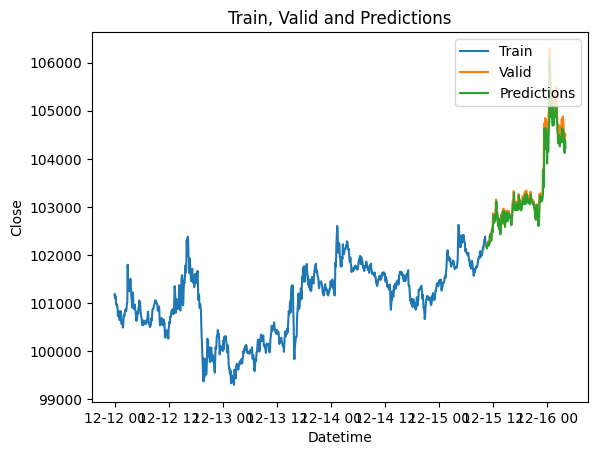

In [59]:
plt.title('Train, Valid and Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')
 
plt.plot(train['Close'])
plt.plot(valid[['Close']])
plt.plot(predict)
 
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper right')
 
plt.show()

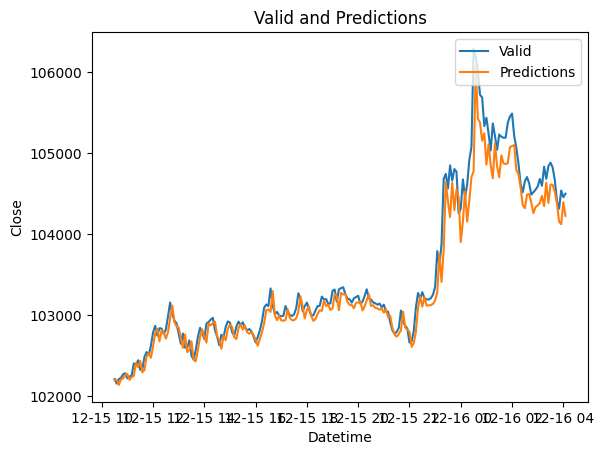

In [60]:
plt.title('Valid and Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')

plt.plot(valid[['Close']])
plt.plot(predict)
 
plt.legend(['Valid', 'Predictions'], loc='upper right')
 
plt.show()

In [61]:
closing_prices = scaled_data[len(scaled_data)-lookback:]
closing_prices = closing_prices.reshape(closing_prices.shape[0], 1)
print(closing_prices)

[[0.50277811]
 [0.51908468]
 [0.54268071]
 [0.54827603]
 [0.5453817 ]
 [0.57664379]
 [0.54662213]
 [0.5312889 ]
 [0.53516328]
 [0.52881252]
 [0.52750505]
 [0.52825936]
 [0.54545099]
 [0.53568292]
 [0.52962718]
 [0.52788053]
 [0.5307201 ]
 [0.54175094]
 [0.56807032]
 [0.55840059]
 [0.53646628]
 [0.54534594]
 [0.55166876]
 [0.53980985]
 [0.52874994]
 [0.52902485]
 [0.53758825]
 [0.54528001]
 [0.54594269]
 [0.56229173]
 [0.55688526]
 [0.55782284]
 [0.54930301]
 [0.55022384]
 [0.57256044]
 [0.57454177]
 [0.55310363]
 [0.57504353]
 [0.57723383]
 [0.57871899]
 [0.56615716]
 [0.55875148]
 [0.55721045]
 [0.55153243]
 [0.55932811]
 [0.56133962]
 [0.56367854]
 [0.54959803]
 [0.55296842]
 [0.56312426]
 [0.57505023]
 [0.55939963]
 [0.55679027]
 [0.55185203]
 [0.55040152]
 [0.5478715 ]
 [0.54990423]
 [0.54348866]
 [0.54791061]
 [0.53575779]
 [0.53552647]
 [0.51645855]
 [0.50249538]
 [0.49631448]
 [0.49972509]
 [0.50680893]
 [0.53750891]
 [0.51856169]
 [0.51063861]
 [0.50572943]
 [0.48097567]
 [0.48

In [62]:
current_batch = closing_prices.reshape(1, lookback, 1)
print(current_batch)

[[[0.50277811]
  [0.51908468]
  [0.54268071]
  [0.54827603]
  [0.5453817 ]
  [0.57664379]
  [0.54662213]
  [0.5312889 ]
  [0.53516328]
  [0.52881252]
  [0.52750505]
  [0.52825936]
  [0.54545099]
  [0.53568292]
  [0.52962718]
  [0.52788053]
  [0.5307201 ]
  [0.54175094]
  [0.56807032]
  [0.55840059]
  [0.53646628]
  [0.54534594]
  [0.55166876]
  [0.53980985]
  [0.52874994]
  [0.52902485]
  [0.53758825]
  [0.54528001]
  [0.54594269]
  [0.56229173]
  [0.55688526]
  [0.55782284]
  [0.54930301]
  [0.55022384]
  [0.57256044]
  [0.57454177]
  [0.55310363]
  [0.57504353]
  [0.57723383]
  [0.57871899]
  [0.56615716]
  [0.55875148]
  [0.55721045]
  [0.55153243]
  [0.55932811]
  [0.56133962]
  [0.56367854]
  [0.54959803]
  [0.55296842]
  [0.56312426]
  [0.57505023]
  [0.55939963]
  [0.55679027]
  [0.55185203]
  [0.55040152]
  [0.5478715 ]
  [0.54990423]
  [0.54348866]
  [0.54791061]
  [0.53575779]
  [0.53552647]
  [0.51645855]
  [0.50249538]
  [0.49631448]
  [0.49972509]
  [0.50680893]
  [0.53750

In [63]:
predictions = []
time = int(24*60/5/2)
for i in range(time):  # Predicting 12 hours
    # Get the prediction (next hour)
    next_prediction = model.predict(current_batch)
    # print(scaler.inverse_transform(next_prediction))
    # Reshape the prediction to fit the batch dimension
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    
    # Append the prediction to the batch used for predicting
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    
    # Inverse transform the prediction to the original price scale
    predictions.append(scaler.inverse_transform(next_prediction)[0, 0])
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━

In [64]:
last_time = crypto_data_close.index[-1]
next_time = last_time + pd.Timedelta(minutes=5)
prediction_times = pd.date_range(start=next_time, periods=len(predictions), freq='5min')
predict = pd.DataFrame(index=prediction_times, data=predictions, columns=['Close'])
print(predict)

                                   Close
2024-12-16 04:10:00+00:00  104296.429688
2024-12-16 04:15:00+00:00  104063.140625
2024-12-16 04:20:00+00:00  103869.937500
2024-12-16 04:25:00+00:00  103725.390625
2024-12-16 04:30:00+00:00  103613.164062
...                                  ...
2024-12-16 15:45:00+00:00  102018.125000
2024-12-16 15:50:00+00:00  102017.812500
2024-12-16 15:55:00+00:00  102017.515625
2024-12-16 16:00:00+00:00  102017.234375
2024-12-16 16:05:00+00:00  102016.953125

[144 rows x 1 columns]


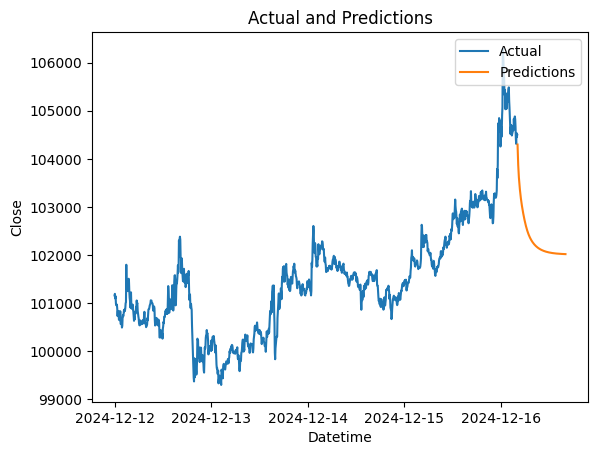

In [65]:
plt.title('Actual and Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')

plt.plot(crypto_data_close[['Close']])
plt.plot(predict)
 
plt.legend(['Actual', 'Predictions'], loc='upper right')
 
plt.show()

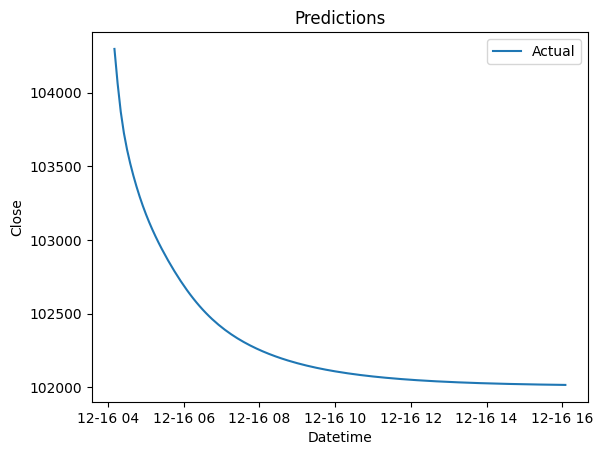

In [66]:
plt.title('Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')

plt.plot(predict)
 
plt.legend(['Actual', 'Predictions'], loc='upper right')
 
plt.show()